In [1]:
# Importing Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('smartphone_cleaned_v2.csv')

In [4]:
df.head()

,brand_name,model,price,rating,has_dual_sim,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_core,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_cap,screen_size,resolution,refresh_rate,num_rear_camera,num_front_camera,primary_rear_camera,primary_front_camera,extended_memory,os,extended_memory_available,operating_system,fast_charging_available
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,True,False,Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,12.0,256.0,5000.0,100.0,6.70,1440 x 3216,120,3,1,50.0,16,0,Android,0,Android,1
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,True,False,False,Snapdragon 695,snapdragon,Octa Core,2.2,6.0,128.0,5000.0,33.0,6.59,1080 x 2412,120,3,1,64.0,16,1 TB,Android,1,Android,1
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,True,False,False,Exynos 1330,exynos,Octa Core,2.4,4.0,64.0,5000.0,15.0,6.60,1080 x 2408,90,3,1,50.0,13,1 TB,Android,1,Android,1
3,motorola,Motorola Moto G62 5G,14999,81.0,True,True,False,False,Snapdragon 695,snapdragon,Octa Core,2.2,6.0,128.0,5000.0,0.0,6.55,1080 x 2400,120,3,1,50.0,16,1 TB,Android,1,Android,0
4,realme,Realme 10 Pro Plus,24999,82.0,True,True,False,False,Dimensity 1080,dimensity,Octa Core,2.6,6.0,128.0,5000.0,67.0,6.70,1080 x 2412,120,3,1,108.0,16,0,Android,0,Android,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_dual_sim               980 non-null    bool   
 5   has_5g                     980 non-null    bool   
 6   has_nfc                    980 non-null    bool   
 7   has_ir_blaster             980 non-null    bool   
 8   processor_name             960 non-null    object 
 9   processor_brand            960 non-null    object 
 10  num_core                   974 non-null    object 
 11  processor_speed            938 non-null    float64
 12  ram_capacity               977 non-null    float64
 13  internal_memory            980 non-null    float64

#### brand_name

<AxesSubplot:>

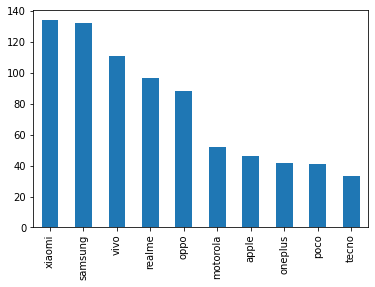

In [6]:
# Plot a graph of top 5 brands
df['brand_name'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:ylabel='brand_name'>

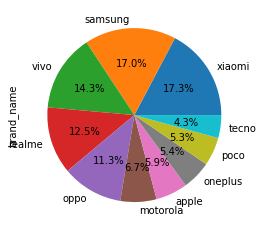

In [7]:
# top 10 in percentage through pie_chart
df['brand_name'].value_counts().head(10).plot(kind='pie',autopct = '%0.1f%%')

In [8]:
# check missing values
df['brand_name'].isnull().sum()

0

In [9]:
# MODEL COLUMN (supporting column)
df['model'].nunique()

980

## Numerical column 
- discriptive statistics : describe()
- distribution : plot - histogram , kde, boxplot to detect outlier
- missing values : fillna() , dropna()

## Categorical column
- value_counts (create count plot)
- pie chart plot

#### COLUMN (numerical) : "price"
- the distribution is not normal it is skewed
- there are outlirs in the data

In [10]:
df['price'].describe()
# std and mean value is very high because of outliers
# clean deviation between mean and median which shows our distribution is skewed
# max value is very high

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

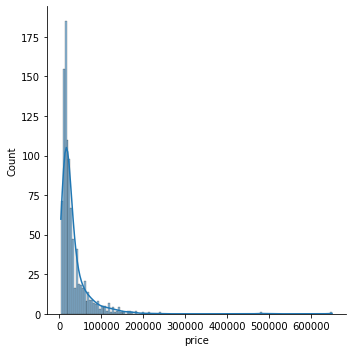

In [11]:
# plot both histogram and kde plot
sns.displot(kind='hist',data=df,x='price',kde=True)
# this is highly skewed : most phones come under low price category and few phones comeunder high price


In [12]:
df['price'].skew()
# to check skewness - not a normal distribution

6.591790999665567

<AxesSubplot:>

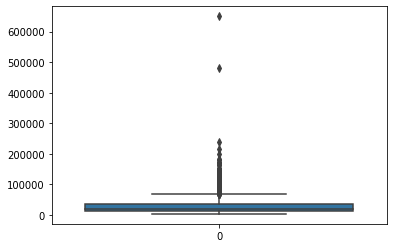

In [13]:
sns.boxplot(df['price'])
# 2 numbers are crazy highly

In [14]:
df[df['price'] > 200000]
# study - they are made up of gold and diamond which is not a desirable factor 
# treat them as an outlier

,brand_name,model,price,rating,has_dual_sim,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_core,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_cap,screen_size,resolution,refresh_rate,num_rear_camera,num_front_camera,primary_rear_camera,primary_front_camera,extended_memory,os,extended_memory_available,operating_system,fast_charging_available
427,vertu,Vertu Signature Touch,650000,62.0,False,False,True,False,Snapdragon 801,snapdragon,Octa Core,1.50,2.0,64.0,2275.0,-1.0,4.70,1080 x 1920,60,1,1,13.0,2.1,0,Android,0,Android,0
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,True,False,True,True,Snapdragon 8+ Gen1,snapdragon,Octa Core,3.20,NaN,1024.0,4700.0,66.0,6.74,1212 x 2616,120,3,1,50.0,13,256 GB,others,1,Hongmeng,1
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,True,False,True,False,Snapdragon 855,snapdragon,Octa Core,2.80,8.0,256.0,4000.0,27.0,6.39,1080 x 2340,60,3,1,48.0,20,0,Android,0,Android,1
951,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,True,Kirin 990,kirin,Octa Core,2.86,12.0,512.0,4500.0,0.0,6.53,1176 x 2400,60,1,2,40.0,32,256 GB,Android,1,Android,0


In [15]:
# removing outliers
df = df[df['price'] < 200000]

In [16]:
df.shape

(976, 28)

#### COLUMN (numerical) : "rating"
- near to normal distribution
- 10% missing values
- no outliers

In [17]:
df['rating'].describe()

count    876.000000
mean      78.262557
std        7.387218
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

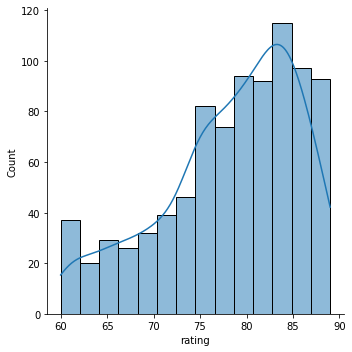

In [18]:
# # plot both histogram and kde plot
sns.displot(kind='hist',data=df,x='rating',kde=True)
# this seemm like near to normal curve


In [19]:
df['rating'].skew() # near to normal

-0.6980929290123327

<AxesSubplot:>

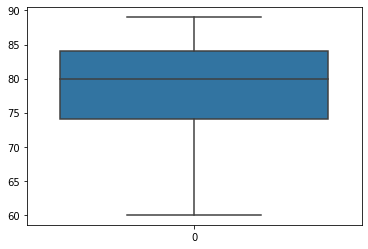

In [20]:
sns.boxplot(df['rating'])
# no outliers

In [21]:
df["rating"].isnull().sum()/df.shape[0]
# 10% missing values

0.10245901639344263

#### COLUMN (categorical)  : "has_5g"
- it can become a good column to predict the price of the phone

In [22]:
df['has_5g'].value_counts()

True     548
False    428
Name: has_5g, dtype: int64

<AxesSubplot:ylabel='has_5g'>

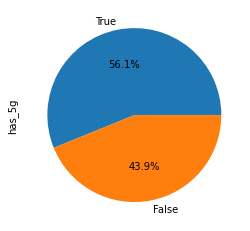

In [23]:
df['has_5g'].value_counts().plot(kind='pie',autopct = '%0.1f%%')
# 56% phones are 5g enabled so it is, this could become a good column to predict price of the phone

#### COLUMN (categorical)  : "has_nfc"
- it can also become a good column to predict the price of the phone

In [24]:
df['has_nfc'].value_counts()

False    587
True     389
Name: has_nfc, dtype: int64

<AxesSubplot:ylabel='has_nfc'>

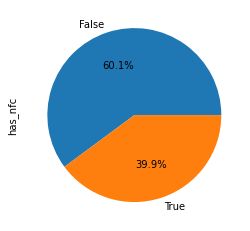

In [25]:
df['has_nfc'].value_counts().plot(kind='pie',autopct = '%0.1f%%')

#### COLUMN (categorical)  : "has_ir_blaster"
- it can also become a good column to predict the price of the phone

In [26]:
df['has_ir_blaster'].value_counts()

False    819
True     157
Name: has_ir_blaster, dtype: int64

<AxesSubplot:ylabel='has_ir_blaster'>

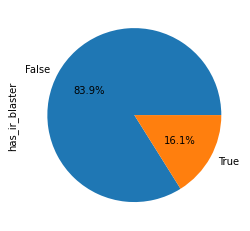

In [27]:
df['has_ir_blaster'].value_counts().plot(kind='pie',autopct = '%0.1f%%')

In [28]:
df[df['has_ir_blaster'] == True]['brand_name'].value_counts()

xiaomi     109
poco        30
iqoo         6
vivo         4
huawei       4
redmi        2
honor        1
samsung      1
Name: brand_name, dtype: int64

<AxesSubplot:ylabel='processor_brand'>

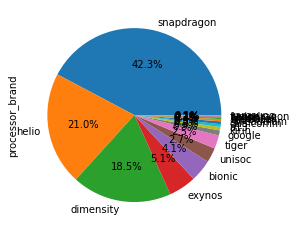

In [29]:
df['processor_brand'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<AxesSubplot:ylabel='num_core'>

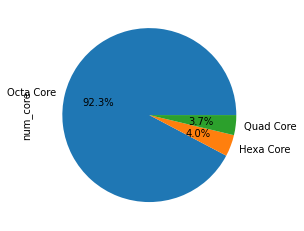

In [30]:
df['num_core'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<AxesSubplot:ylabel='fast_charging_available'>

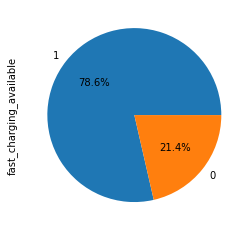

In [31]:
df['fast_charging_available'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<AxesSubplot:ylabel='ram_capacity'>

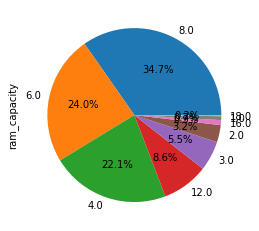

In [32]:
df['ram_capacity'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<AxesSubplot:ylabel='internal_memory'>

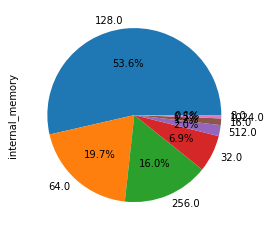

In [33]:
df['internal_memory'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<AxesSubplot:ylabel='refresh_rate'>

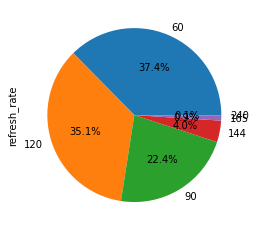

In [34]:
df['refresh_rate'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [35]:
df['refresh_rate'].value_counts()

60     365
120    343
90     219
144     39
165      9
240      1
Name: refresh_rate, dtype: int64

In [36]:
temp = df[df['num_front_camera'] == 'Missing']

In [37]:
df.loc[temp.index,'num_front_camera'] = 0

In [38]:
df['num_front_camera'].value_counts()

1    932
2     28
0     16
Name: num_front_camera, dtype: int64

<AxesSubplot:ylabel='os'>

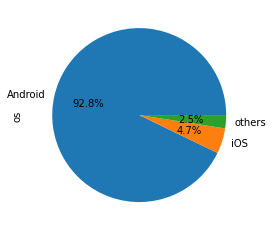

In [39]:
df['os'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='extended_memory_available'>

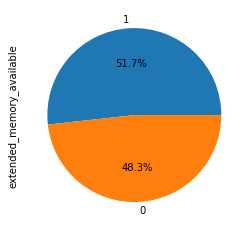

In [40]:
# extended_memory_available
df['extended_memory_available'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [53]:
df['extended_memory'] = df['extended_memory'].apply(lambda x:np.nan if x == '0' else x)

In [54]:
df['extended_memory'].value_counts()

1 TB       262
512 GB     116
256 GB     102
128 GB      10
2 TB         8
32 GB        3
64 GB        3
1000 GB      1
Name: extended_memory, dtype: int64

<AxesSubplot:ylabel='extended_memory'>

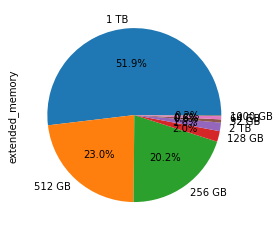

In [55]:
df['extended_memory'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [60]:
def plot_graphs(column_name):

  sns.displot(kind='hist',kde=True,data=df,x=column_name,label=column_name)
  sns.catplot(kind='box',data=df,x=column_name)

In [61]:
df.head()

,brand_name,model,price,rating,has_dual_sim,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_core,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_cap,screen_size,resolution,refresh_rate,num_rear_camera,num_front_camera,primary_rear_camera,primary_front_camera,extended_memory,os,extended_memory_available,operating_system,fast_charging_available
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,True,False,Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,12.0,256.0,5000.0,100.0,6.70,1440 x 3216,120,3,1,50.0,16,NaN,Android,0,Android,1
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,True,False,False,Snapdragon 695,snapdragon,Octa Core,2.2,6.0,128.0,5000.0,33.0,6.59,1080 x 2412,120,3,1,64.0,16,1 TB,Android,1,Android,1
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,True,False,False,Exynos 1330,exynos,Octa Core,2.4,4.0,64.0,5000.0,15.0,6.60,1080 x 2408,90,3,1,50.0,13,1 TB,Android,1,Android,1
3,motorola,Motorola Moto G62 5G,14999,81.0,True,True,False,False,Snapdragon 695,snapdragon,Octa Core,2.2,6.0,128.0,5000.0,0.0,6.55,1080 x 2400,120,3,1,50.0,16,1 TB,Android,1,Android,0
4,realme,Realme 10 Pro Plus,24999,82.0,True,True,False,False,Dimensity 1080,dimensity,Octa Core,2.6,6.0,128.0,5000.0,67.0,6.70,1080 x 2412,120,3,1,108.0,16,NaN,Android,0,Android,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, 'oneplus'),
  Text(1, 0, 'samsung'),
  Text(2, 0, 'motorola'),
  Text(3, 0, 'realme'),
  Text(4, 0, 'apple'),
  Text(5, 0, 'xiaomi'),
  Text(6, 0, 'nothing'),
  Text(7, 0, 'oppo'),
  Text(8, 0, 'vivo'),
  Text(9, 0, 'poco'),
  Text(10, 0, 'iqoo'),
  Text(11, 0, 'jio'),
  Text(12, 0, 'gionee'),
  Text(13, 0, 'tecno'),
  Text(14, 0, 'tesla'),
  Text(15, 0, 'google'),
  Text(16, 0, 'infinix'),
  Text(17, 0, 'cola'),
  Text(18, 0, 'letv'),
  Text(19, 0, 'ikall'),
  Text(20, 0, 'leeco'),
  Text(21, 0, 'duoqin'),
  Text(22, 0, 'nokia'),
  Text(23, 0, 'lava'),
  Text(24, 0, 'honor'),
  Text(25, 0, 'nubia'),
  Text(26, 0, 'redmi'),
  Text(27, 0, 'asus'),
  Text(28, 0, 'itel'),
  Text(29, 0, 'royole'),
  Text(30, 0, 'sony'),
  Text(31, 0, 'oukitel'),
  Text(32, 0, 'blu'),
  Text(

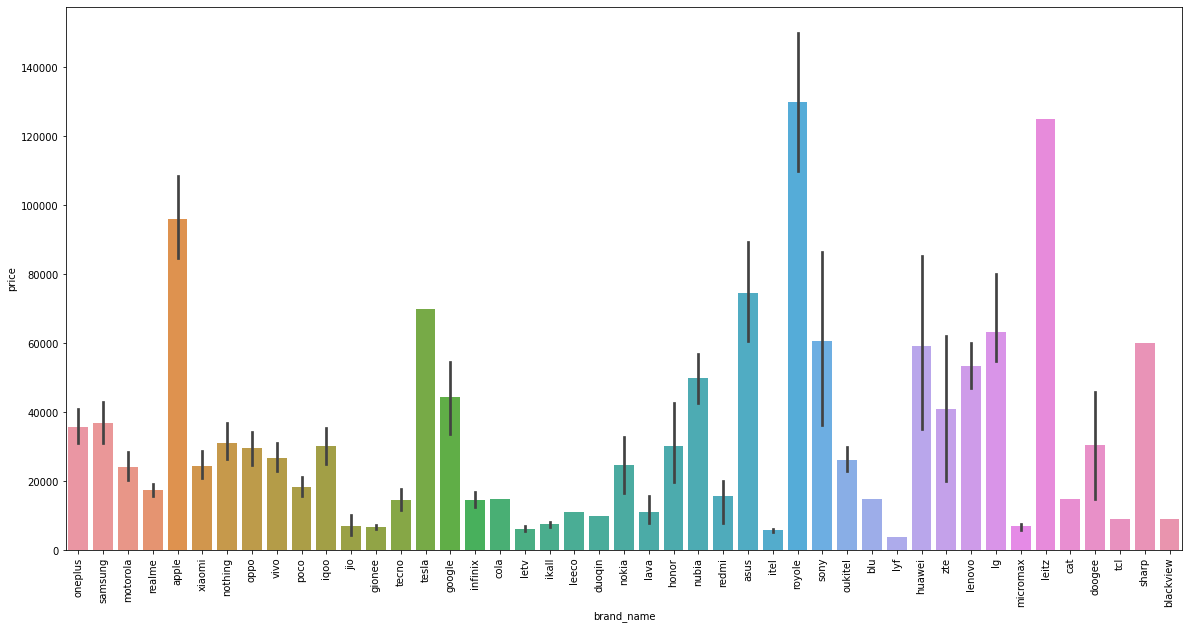

In [62]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand_name',y='price')
plt.xticks(rotation='vertical')

In [63]:
x = df.groupby('brand_name').count()['model'] 

In [64]:
temp_df = df[df['brand_name'].isin(x[x > 10].index)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'oneplus'),
  Text(1, 0, 'samsung'),
  Text(2, 0, 'motorola'),
  Text(3, 0, 'realme'),
  Text(4, 0, 'apple'),
  Text(5, 0, 'xiaomi'),
  Text(6, 0, 'oppo'),
  Text(7, 0, 'vivo'),
  Text(8, 0, 'poco'),
  Text(9, 0, 'iqoo'),
  Text(10, 0, 'tecno'),
  Text(11, 0, 'google'),
  Text(12, 0, 'infinix'),
  Text(13, 0, 'nokia'),
  Text(14, 0, 'honor'),
  Text(15, 0, 'huawei')])

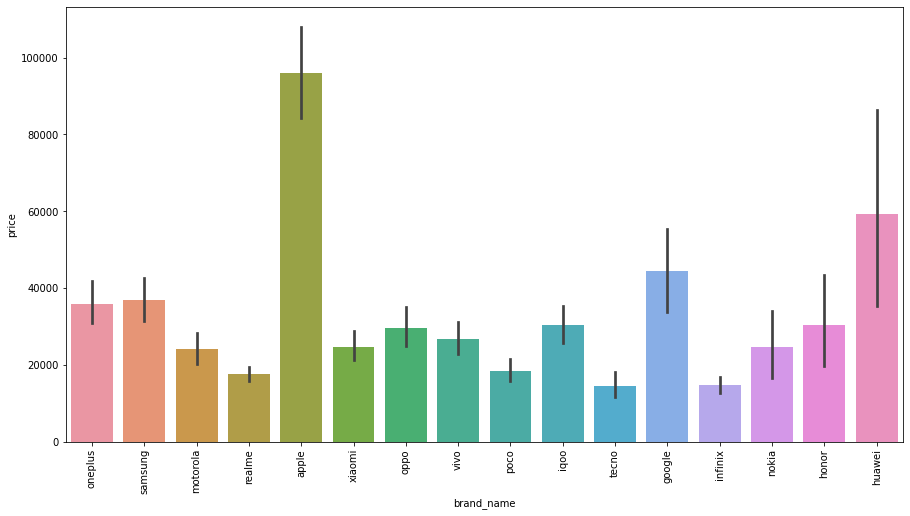

In [65]:
plt.figure(figsize=(15,8))
sns.barplot(data=temp_df,x='brand_name',y='price')
plt.xticks(rotation='vertical')

In [66]:
df.head()

,brand_name,model,price,rating,has_dual_sim,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_core,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_cap,screen_size,resolution,refresh_rate,num_rear_camera,num_front_camera,primary_rear_camera,primary_front_camera,extended_memory,os,extended_memory_available,operating_system,fast_charging_available
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,True,False,Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,12.0,256.0,5000.0,100.0,6.70,1440 x 3216,120,3,1,50.0,16,NaN,Android,0,Android,1
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,True,False,False,Snapdragon 695,snapdragon,Octa Core,2.2,6.0,128.0,5000.0,33.0,6.59,1080 x 2412,120,3,1,64.0,16,1 TB,Android,1,Android,1
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,True,False,False,Exynos 1330,exynos,Octa Core,2.4,4.0,64.0,5000.0,15.0,6.60,1080 x 2408,90,3,1,50.0,13,1 TB,Android,1,Android,1
3,motorola,Motorola Moto G62 5G,14999,81.0,True,True,False,False,Snapdragon 695,snapdragon,Octa Core,2.2,6.0,128.0,5000.0,0.0,6.55,1080 x 2400,120,3,1,50.0,16,1 TB,Android,1,Android,0
4,realme,Realme 10 Pro Plus,24999,82.0,True,True,False,False,Dimensity 1080,dimensity,Octa Core,2.6,6.0,128.0,5000.0,67.0,6.70,1080 x 2412,120,3,1,108.0,16,NaN,Android,0,Android,1


<AxesSubplot:xlabel='rating', ylabel='price'>

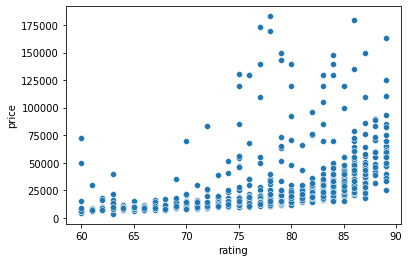

In [67]:
sns.scatterplot(data=df,x='rating',y='price')

<AxesSubplot:xlabel='has_5g', ylabel='price'>

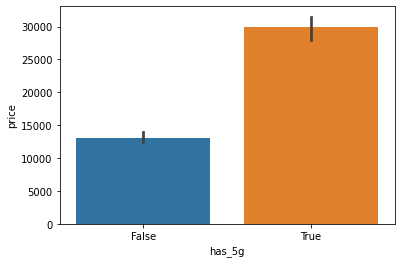

In [68]:
sns.barplot(data=temp_df,x='has_5g',y='price',estimator=np.median)

<AxesSubplot:xlabel='has_nfc', ylabel='price'>

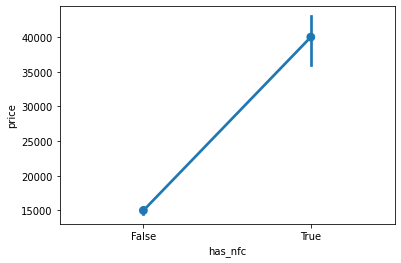

In [69]:
sns.pointplot(data=temp_df,x='has_nfc',y='price',estimator=np.median)

<AxesSubplot:xlabel='has_ir_blaster', ylabel='price'>

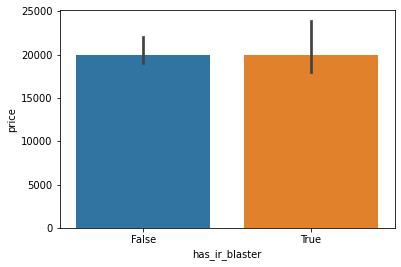

In [70]:
sns.barplot(data=temp_df,x='has_ir_blaster',y='price',estimator=np.median)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'snapdragon'),
  Text(1, 0, 'exynos'),
  Text(2, 0, 'dimensity'),
  Text(3, 0, 'bionic'),
  Text(4, 0, 'helio'),
  Text(5, 0, 'a13'),
  Text(6, 0, 'unisoc'),
  Text(7, 0, 'google'),
  Text(8, 0, 'tiger'),
  Text(9, 0, 'apple'),
  Text(10, 0, 'sc9863a'),
  Text(11, 0, 'sanpdragon'),
  Text(12, 0, 'fusion'),
  Text(13, 0, 'kirin'),
  Text(14, 0, 'spreadtrum'),
  Text(15, 0, 'mediatek'),
  Text(16, 0, 'qualcomm'),
  Text(17, 0, 'samsung')])

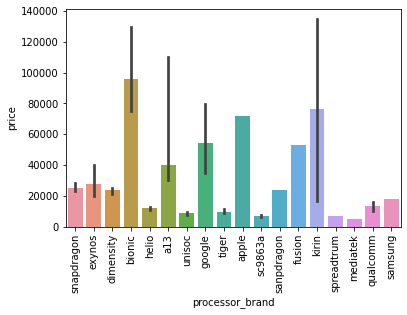

In [72]:
sns.barplot(data=temp_df,x='processor_brand',y='price',estimator=np.median)
plt.xticks(rotation='vertical')

(array([0, 1, 2]),
 [Text(0, 0, 'Octa Core'), Text(1, 0, 'Hexa Core'), Text(2, 0, 'Quad Core')])

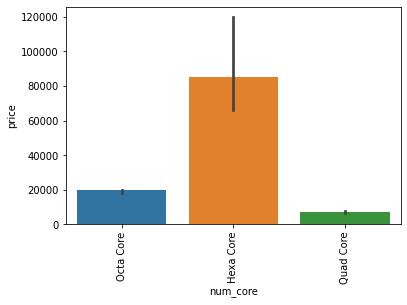

In [74]:
sns.barplot(data=temp_df,x='num_core',y='price',estimator=np.median)
plt.xticks(rotation='vertical')

In [75]:
pd.crosstab(df['num_core'],df['os'])

os,Android,iOS,others
num_core,,,
Hexa Core,0,39,0
Octa Core,873,1,21
Quad Core,32,1,3


<AxesSubplot:xlabel='processor_speed', ylabel='price'>

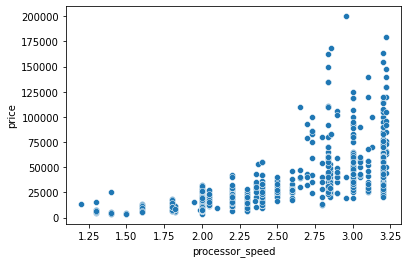

In [76]:
sns.scatterplot(data=df,x='processor_speed',y='price')

<AxesSubplot:xlabel='screen_size', ylabel='price'>

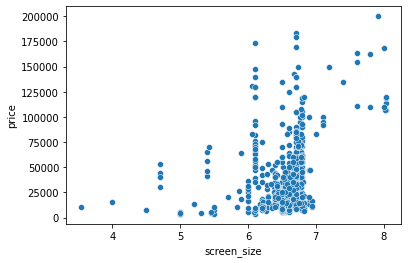

In [77]:
sns.scatterplot(data=df,x='screen_size',y='price')

In [78]:
df.corr()['price']

price                        1.000000
rating                       0.440310
has_dual_sim                -0.078803
has_5g                       0.449403
has_nfc                      0.565145
has_ir_blaster              -0.035643
processor_speed              0.677717
ram_capacity                 0.516906
internal_memory              0.700274
battery_capacity            -0.143090
fast_charging_cap            0.212547
screen_size                  0.268080
refresh_rate                 0.365485
num_rear_camera              0.093697
primary_rear_camera          0.135230
extended_memory_available   -0.415518
fast_charging_available     -0.022404
Name: price, dtype: float64

In [79]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       100
has_dual_sim                   0
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_name                20
processor_brand               20
num_core                       6
processor_speed               42
ram_capacity                   2
internal_memory                0
battery_capacity              11
fast_charging_cap              0
screen_size                    0
resolution                     0
refresh_rate                   0
num_rear_camera                0
num_front_camera               0
primary_rear_camera            0
primary_front_camera           0
extended_memory              471
os                             0
extended_memory_available      0
operating_system              14
fast_charging_available        0
dtype: int64

In [80]:
df.corr()['rating']

price                        0.440310
rating                       1.000000
has_dual_sim                -0.007144
has_5g                       0.599009
has_nfc                      0.478652
has_ir_blaster               0.156108
processor_speed              0.626405
ram_capacity                 0.758082
internal_memory              0.482339
battery_capacity            -0.020858
fast_charging_cap            0.580247
screen_size                  0.290861
refresh_rate                 0.612806
num_rear_camera              0.285797
primary_rear_camera          0.560266
extended_memory_available   -0.335035
fast_charging_available      0.457297
Name: rating, dtype: float64

In [81]:
# knn imputer
df.shape

(976, 28)

In [82]:
x_df = df.select_dtypes(include=['int64','float64']).drop(columns='price')

In [83]:
from sklearn.impute import KNNImputer

In [84]:
imputer = KNNImputer(n_neighbors=5)

In [85]:
x_df_values = imputer.fit_transform(x_df)

In [86]:
x_df = pd.DataFrame(x_df_values,columns=x_df.columns)

In [87]:
x_df['price'] = df['price']

In [88]:
x_df.head()

,rating,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_cap,screen_size,refresh_rate,num_rear_camera,primary_rear_camera,extended_memory_available,fast_charging_available,price
0,89.0,3.2,12.0,256.0,5000.0,100.0,6.70,120.0,3.0,50.0,0.0,1.0,54999.0
1,81.0,2.2,6.0,128.0,5000.0,33.0,6.59,120.0,3.0,64.0,1.0,1.0,19989.0
2,75.0,2.4,4.0,64.0,5000.0,15.0,6.60,90.0,3.0,50.0,1.0,1.0,16499.0
3,81.0,2.2,6.0,128.0,5000.0,0.0,6.55,120.0,3.0,50.0,1.0,0.0,14999.0
4,82.0,2.6,6.0,128.0,5000.0,67.0,6.70,120.0,3.0,108.0,0.0,1.0,24999.0


In [89]:
a = x_df.corr()['price'].reset_index()

In [90]:
b = df.corr()['price'].reset_index()

In [91]:
b.merge(a,on='index')

,index,price_x,price_y
0,price,1.000000,1.000000
1,rating,0.440310,0.195689
2,processor_speed,0.677717,0.271777
3,ram_capacity,0.516906,0.258044
4,internal_memory,0.700274,0.233421
5,battery_capacity,-0.143090,-0.080031
6,fast_charging_cap,0.212547,0.108785
7,screen_size,0.268080,0.095614
8,refresh_rate,0.365485,0.153936
9,num_rear_camera,0.093697,0.044391


In [92]:
pd.get_dummies(df,columns=['brand_name','processor_brand','os'],drop_first=True).corr()['price']

price                         1.000000
rating                        0.440310
has_dual_sim                 -0.078803
has_5g                        0.449403
has_nfc                       0.565145
                                ...   
processor_brand_spreadtrum   -0.054709
processor_brand_tiger        -0.116654
processor_brand_unisoc       -0.126977
os_iOS                        0.483742
os_others                     0.206932
Name: price, Length: 80, dtype: float64